# Central Limit Theorem
## Author: Snigdhayan Mahanta
The Central Limit Theorem states that if there is a population with mean = $\mu$ and standard deviation = $\sigma$ and one draws "sufficiently large" random samples from the population with replacement, then the distribution of the sample means will be approximately normal. Moreover, $\mu$ and $\sigma$ can be estimated from the sample means in a manner explained below.

In [1]:
# Create random population data of reasonable size
pop_size <- 10000000
min_value <- -3000
max_value <- 9000
set.seed(123)
population1 <- runif(0.3*pop_size, min = min_value, max = min_value/3) # 1st uniform distribution 
population2 <- runif(0.1*pop_size, min = min_value/3, max = max_value/3) # 2nd uniform distribution
population3 <- runif(0.6*pop_size, min = max_value/3, max = max_value) # 3rd uniform distribution 
population <- c(population1, population2, population3) # combined population
# population <- rbinom(pop_size, 1, 0.3) # a different population

In [2]:
# Compute actual mean and actual standard deviation of the population
mu <- mean(population)
sigma <- sd(population)

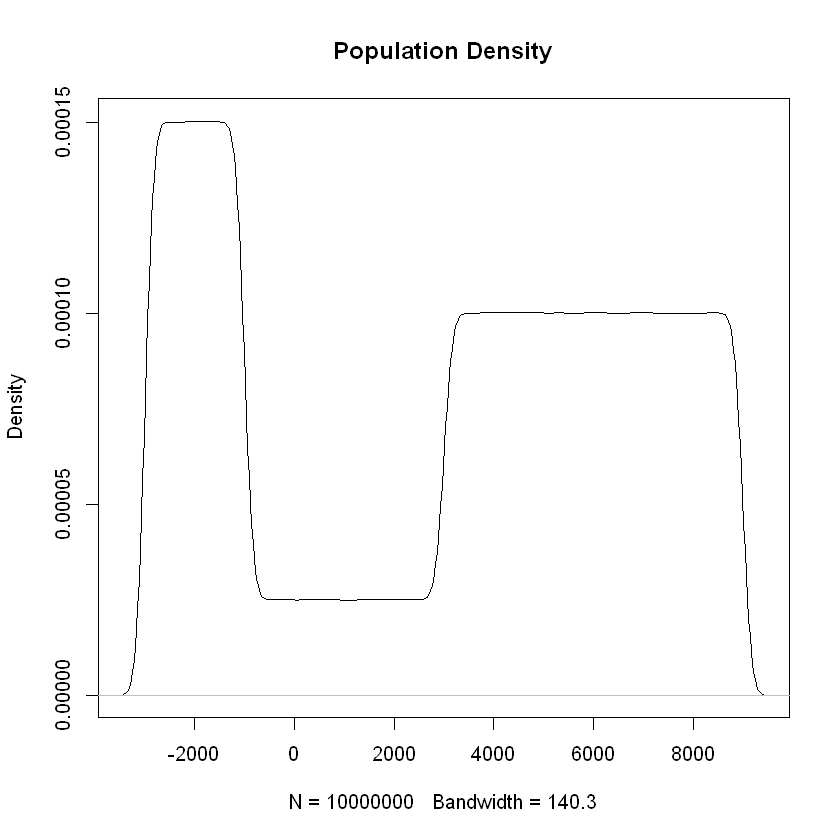

In [3]:
# Plot population density
plot(density(population), main = "Population Density")

In [4]:
# Function to generate sample statistics - draw a random sample and compute its mean; repeat the procedure for the selected no. of trials
sampleMeans <- function(trials = 1000, sample_size) { # default value of no. of trials = 1000
    mySampleMeans <- numeric(trials)
    myPopulation <- population
    for (i in c(1:trials)) {
      sample <- sample(myPopulation, size = sample_size, replace = TRUE)
      mySampleMeans[i] <- mean(sample)
    }
    return(mySampleMeans)
}

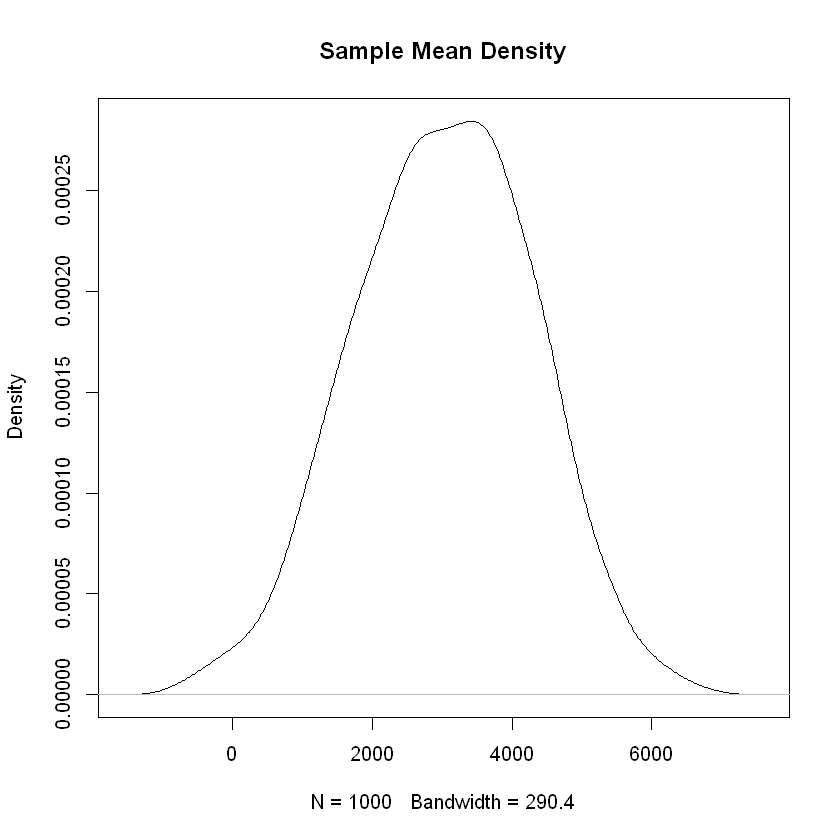

In [5]:
# Plot sample density (sample size = 10)
sample_size <- 10
mySampleMeans <- sampleMeans(sample_size = sample_size)
plot(density(mySampleMeans), main = "Sample Mean Density")

In [6]:
# Compare the actual and the estimated values of mean and standard deviation
mu_estimate <- mean(mySampleMeans) # mean of sample means is a good estimate for population mean
sigma_sample <- sd(mySampleMeans)
sigma_estimate <- sigma_sample*sqrt(sample_size) # standard deviation of sample means is biased and needs to be adjusted
result <- cbind(" " = c("Actual", "Estimated"),
                "Mean" = c(mu, mu_estimate),
                "Standard Deviation" = c(sigma, sigma_estimate))

result

,Mean,Standard Deviation
Actual,3099.80714283538,3914.43938355931
Estimated,3031.44539517616,4062.31356486258


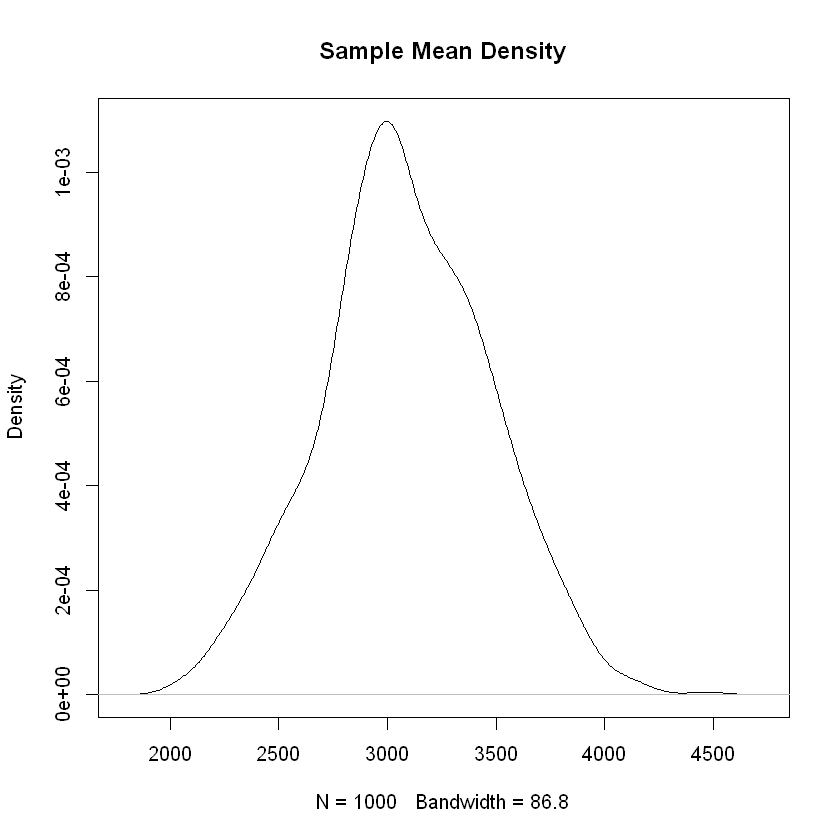

In [7]:
# Plot sample density (sample size = 100)
sample_size <- 100
mySampleMeans <- sampleMeans(sample_size = sample_size)
plot(density(mySampleMeans), main = "Sample Mean Density")

In [8]:
# Compare the actual and the estimated values of mean and standard deviation
mu_estimate <- mean(mySampleMeans) # mean of sample means is a good estimate for population mean
sigma_sample <- sd(mySampleMeans)
sigma_estimate <- sigma_sample*sqrt(sample_size) # standard deviation of sample means is biased and needs to be adjusted
result <- cbind(" " = c("Actual", "Estimated"),
                "Mean" = c(mu, mu_estimate),
                "Standard Deviation" = c(sigma, sigma_estimate))

result

,Mean,Standard Deviation
Actual,3099.80714283538,3914.43938355931
Estimated,3087.9976359167,3859.08668640042


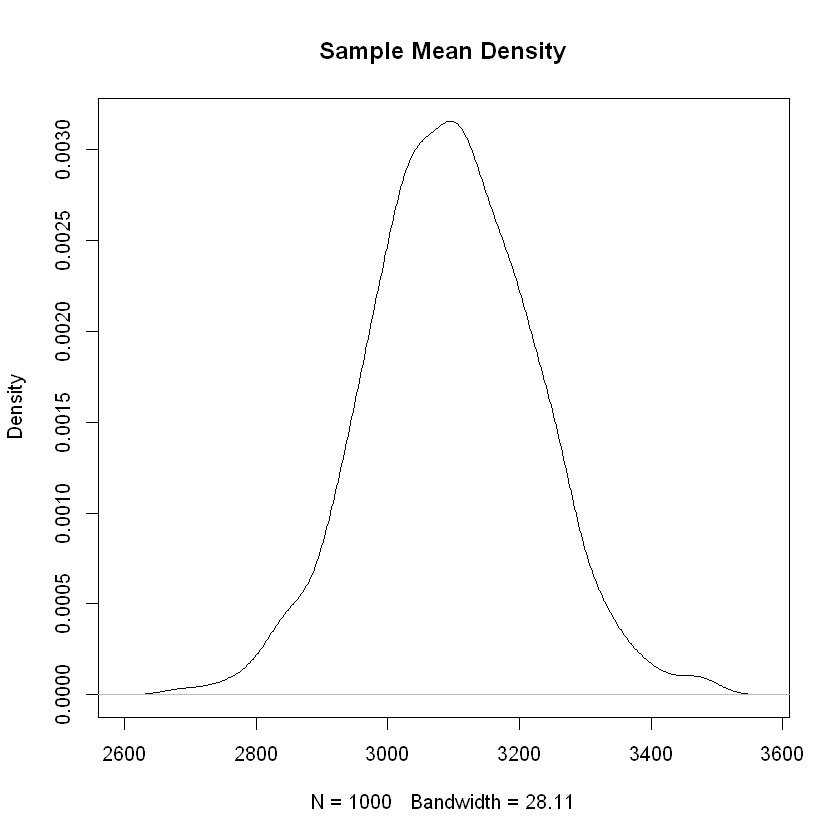

In [9]:
# Plot sample density (sample size = 1000)
sample_size <- 1000 # in this context this sample size is "sufficiently large"
mySampleMeans <- sampleMeans(sample_size = sample_size)
plot(density(mySampleMeans), main = "Sample Mean Density")

In [10]:
# Compare the actual and the estimated values of mean and standard deviation
mu_estimate <- mean(mySampleMeans) # mean of sample means is a good estimate for population mean
sigma_sample <- sd(mySampleMeans)
sigma_estimate <- sigma_sample*sqrt(sample_size) # standard deviation of sample means is biased and needs to be adjusted
result <- cbind(" " = c("Actual", "Estimated"),
                "Mean" = c(mu, mu_estimate),
                "Standard Deviation" = c(sigma, sigma_estimate))

result

,Mean,Standard Deviation
Actual,3099.80714283538,3914.43938355931
Estimated,3096.33681406802,3953.79938636825


Observe that the sample mean density looks more and more like a Gaussian as the sample size increases, although the population density (by construction) was not a Gaussian.